<a href="https://colab.research.google.com/github/polaroidz/polaroidz/blob/main/Intermediate_Regression_in_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
library(dplyr)
library(ggplot2)
library(broom)
library(ggfortify)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
install.packages("ggfortify")
install.packages("broom")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
data(iris)
data(mtcars)

In [4]:
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [28]:
mdl_mpg_wt <- lm(mpg ~ wt, data = mtcars)

mdl_mpg_wt


Call:
lm(formula = mpg ~ wt, data = mtcars)

Coefficients:
(Intercept)           wt  
     37.285       -5.344  


In [9]:
coefficients(mdl_mpg_hp)

hp          wt 
-0.03393526  6.84044997

`geom_smooth()` using formula 'y ~ x'



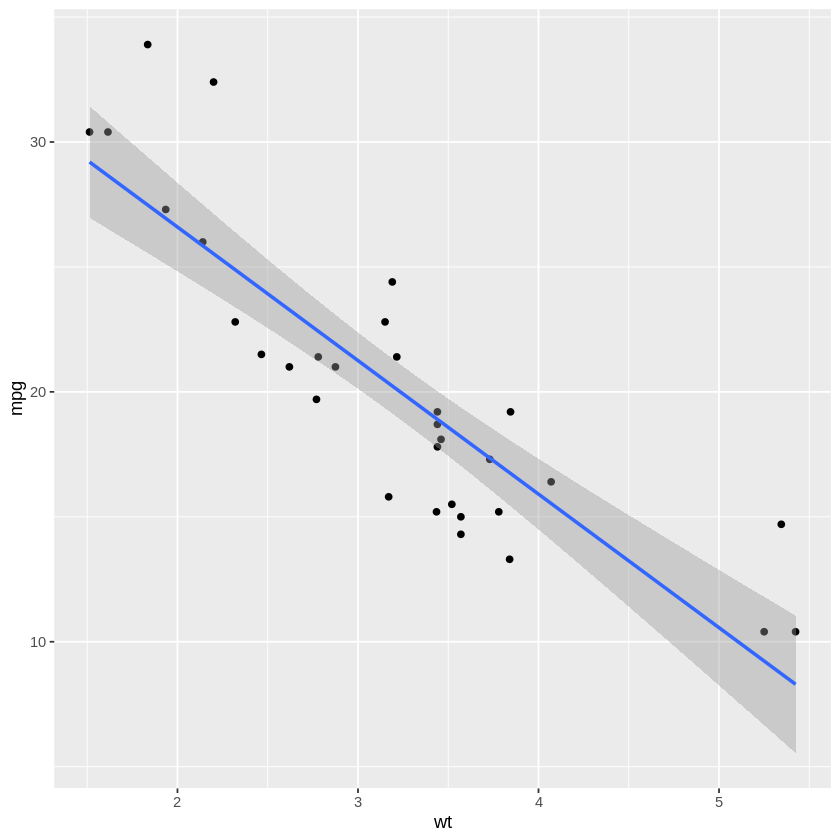

In [19]:
ggplot(mtcars, aes(y = mpg, x = wt)) +
  geom_point() +
  geom_smooth(method = "lm", se = TRUE)

In [ ]:
# Using taiwan_real_estate, plot price_twd_msq vs. n_convenience
# colored by house_age_years
ggplot(taiwan_real_estate, aes(x = n_convenience, y = price_twd_msq, color = house_age_years)) +
  # Add a point layer
  geom_point() +
  # Add parallel slopes, no ribbon
  geom_parallel_slopes(se = FALSE)

In [21]:
explanatory_data <- tibble(
  wt = c(2.5, 2.6, 2.8, 3, 3.2, 3.5, 4)
)

glimpse(explanatory_data)

Rows: 7
Columns: 1
$ wt <dbl> 2.5, 2.6, 2.8, 3.0, 3.2, 3.5, 4.0


In [24]:
prediction_data <- explanatory_data %>%
  mutate(
    mpg = predict(mdl_mpg_wt, explanatory_data)
  )

glimpse(prediction_data)

Rows: 7
Columns: 2
$ wt  <dbl> 2.5, 2.6, 2.8, 3.0, 3.2, 3.5, 4.0
$ mpg <dbl> 13.22906, 13.75822, 14.81655, 15.87487, 16.93320, 18.52068, 21.166…
